In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans 


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\GNANASEKARAN\\OneDrive\\Documents\\Python Project\\Social Media Data for DSBA.csv') 

In [3]:
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [4]:
df.tail()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
11755,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1,23
11756,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1,11
11757,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1,12
11758,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0,20
11759,1011760,No,270.0,Tab,22025.0,8,3,Historical site,104.0,4470,2,No,29,No,1,0,14


In [5]:
df.shape

(11760, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,11760.0,1.005880e+06,3394.963917,1000001.0,1002940.75,1005880.5,1008820.25,1011760.0
Yearly_avg_view_on_travel_page,11179.0,2.808308e+02,68.182958,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,2.817048e+04,14385.032134,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,7.479003e+01,24.026650,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6.531699e+03,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571e+00,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,2.866156e+01,48.660504,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712245e+00,1.080887,1.0,2.00,3.0,4.00,4.0
Adult_flag,11760.0,7.938776e-01,0.851823,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,1.381743e+01,9.070657,0.0,8.00,12.0,18.00,270.0


In [8]:
df.describe(include=["object","category"]).T

,count,unique,top,freq
Taken_product,11760,2,No,9864
preferred_device,11707,10,Tab,4172
yearly_avg_Outstation_checkins,11685,30,1,4543
member_in_family,11760,7,3,4561
preferred_location_type,11729,15,Beach,2424
following_company_page,11657,4,No,8355
working_flag,11760,2,No,9952


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [11]:
#unique values display
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)
        print(df[i].unique()) 
        print()

Taken_product
['Yes' 'No']

preferred_device
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile']

yearly_avg_Outstation_checkins
['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']

member_in_family
['2' '1' '4' 'Three' '3' '5' '10']

preferred_location_type
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']

following_company_page
['Yes' 'No' nan '1' '0']

working_flag
['No' 'Yes']



In [12]:
#Clean the wrong value
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace('*',np.nan)
df['member_in_family'] = df['member_in_family'].replace('Three','3')

df['following_company_page'] = df['following_company_page'].replace('Yes','1')
df['following_company_page'] = df['following_company_page'].replace('No','0')

df['Taken_product'] = df['Taken_product'].replace('Yes','1')
df['Taken_product'] = df['Taken_product'].replace('No','0')

df['working_flag'] = df['working_flag'].replace('Yes','1')
df['working_flag'] = df['working_flag'].replace('No','0')

df['preferred_location_type'] = df['preferred_location_type'].replace('Tour  Travel','Tour and Travel')
df['preferred_location_type'] = df['preferred_location_type'].replace('Game','Entertainment')
df['preferred_location_type'] = df['preferred_location_type'].replace('Movie','Entertainment')
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)
        print(df[i].unique()) 
        print()       

Taken_product
['1' '0']

preferred_device
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile']

yearly_avg_Outstation_checkins
['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '5' '8' '2' '3' '9' '7' '6' '4']

member_in_family
['2' '1' '4' '3' '5' '10']

preferred_location_type
['Financial' 'Other' 'Medical' nan 'Entertainment' 'Social media'
 'Tour and Travel' 'OTT' 'Beach' 'Historical site' 'Big Cities' 'Trekking'
 'Hill Stations']

following_company_page
['1' '0' nan]

working_flag
['0' '1']



In [13]:
#Fixing Adult_flag
df['Adult_flag'] = df['Adult_flag'].apply(lambda x: 0 if x == 0 else 1)
df['Adult_flag'] = pd.Categorical(df['Adult_flag'])

In [14]:
#replace nan values 
df['preferred_location_type'] = df['preferred_location_type'].replace(np.nan,df['preferred_location_type'].mode()[0])
df['preferred_location_type'].unique()

array(['Financial', 'Other', 'Medical', 'Beach', 'Entertainment',
       'Social media', 'Tour and Travel', 'OTT', 'Historical site',
       'Big Cities', 'Trekking', 'Hill Stations'], dtype=object)

In [15]:
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace(np.nan,df['yearly_avg_Outstation_checkins'].mode()[0])
df['yearly_avg_Outstation_checkins'].unique()

array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
       '25', '12', '18', '29', '22', '14', '20', '28', '17', '13', '5',
       '8', '2', '3', '9', '7', '6', '4'], dtype=object)

In [16]:
df['following_company_page'] = df['following_company_page'].replace(np.nan,df['following_company_page'].mode()[0])
df['following_company_page'].unique()

array(['1', '0'], dtype=object)

In [17]:
df['preferred_device'] = df['preferred_device'].replace(np.nan,df['preferred_device'].mode()[0])

In [18]:
#renaming other types to Mobile
df['preferred_device'] = df['preferred_device'].replace("iOS and Android","Mobile")
df['preferred_device'] = df['preferred_device'].replace("iOS","Mobile")
df['preferred_device'] = df['preferred_device'].replace("ANDROID","Mobile")
df['preferred_device'] = df['preferred_device'].replace("Tab","Mobile")
df['preferred_device'] = df['preferred_device'].replace("Android","Mobile")
df['preferred_device'] = df['preferred_device'].replace("Android OS","Mobile")
df['preferred_device'] = df['preferred_device'].replace("Other","Mobile")
df['preferred_device'] = df['preferred_device'].replace("Others","Mobile")
df['preferred_device'].unique()

array(['Mobile', 'Laptop'], dtype=object)

In [19]:
#converting data types
df['Adult_flag'] = pd.Categorical(df['Adult_flag'])
df['Taken_product'] = pd.Categorical(df['Taken_product'])
df['member_in_family'] = pd.Categorical(df['member_in_family'])
df['following_company_page'] = pd.Categorical(df['following_company_page'])
df['working_flag'] = pd.Categorical(df['working_flag'])
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].astype(int)

In [20]:
df['Yearly_avg_view_on_travel_page'] = df['Yearly_avg_view_on_travel_page'].replace(np.nan,df['Yearly_avg_view_on_travel_page'].median())
df['total_likes_on_outstation_checkin_given'] = df['total_likes_on_outstation_checkin_given'].replace(np.nan,df['total_likes_on_outstation_checkin_given'].median())
df['Yearly_avg_comment_on_travel_page'] = df['Yearly_avg_comment_on_travel_page'].replace(np.nan,df['Yearly_avg_comment_on_travel_page'].median())

In [21]:
#drop UserID
df = df.drop('UserID',axis=1)

In [22]:
df.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Taken_product                                 11760 non-null  category
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64 
 2   preferred_device                              11760 non-null  object  
 3   total_likes_on_outstation_checkin_given       11760 non-null  float64 
 4   yearly_avg_Outstation_checkins                11760 non-null  int32   
 5   member_in_family                              11760 non-null  category
 6   preferred_location_type                       11760 non-null  object  
 7   Yearly_avg_comment_on_travel_page             11760 non-null  float64 
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64   
 9   week_since_last_outstation_checkin            1176

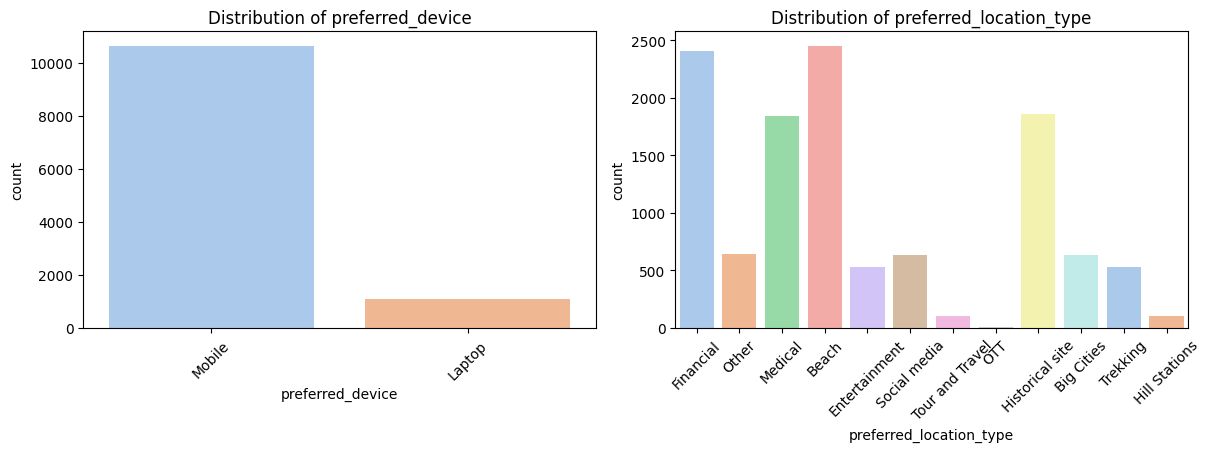

In [24]:
#Univariate analysis
cat_cols = df.select_dtypes(include='object').columns
plt.figure(figsize=(18, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

In [25]:
df.columns

Index(['Taken_product', 'Yearly_avg_view_on_travel_page', 'preferred_device',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [26]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Yearly_avg_view_on_travel_page),stats.skew(df.total_likes_on_outstation_checkin_given),
                                       stats.skew(df.yearly_avg_Outstation_checkins),stats.skew(df.Yearly_avg_comment_on_travel_page),
                                       stats.skew(df.total_likes_on_outofstation_checkin_received),stats.skew(df.week_since_last_outstation_checkin),
                                       stats.skew(df.montly_avg_comment_on_company_page),
                                      stats.skew(df.travelling_network_rating),
                                      stats.skew(df.Daily_Avg_mins_spend_on_traveling_page)]},
                        index=['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 
                               'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 
                               'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin',
                               'montly_avg_comment_on_company_page', 'travelling_network_rating',
                               'Daily_Avg_mins_spend_on_traveling_page'])  

Skewness

,Skewness
Yearly_avg_view_on_travel_page,0.446079
total_likes_on_outstation_checkin_given,0.498350
yearly_avg_Outstation_checkins,0.977120
Yearly_avg_comment_on_travel_page,4.910321
total_likes_on_outofstation_checkin_received,1.368404
week_since_last_outstation_checkin,0.915217
montly_avg_comment_on_company_page,7.683170
travelling_network_rating,-0.302518
Daily_Avg_mins_spend_on_traveling_page,4.480111


<Axes: xlabel='travelling_network_rating', ylabel='count'>

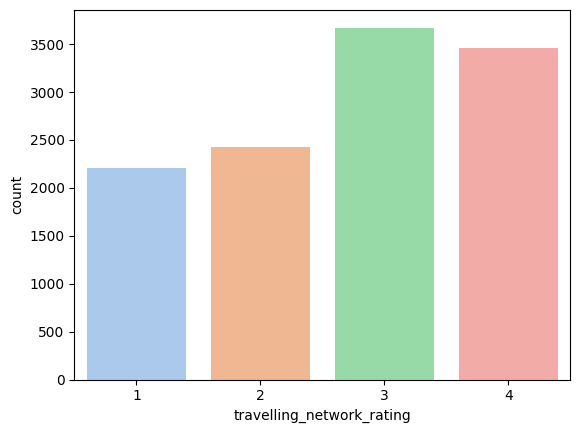

In [27]:
#categorical variable
sns.countplot(x='travelling_network_rating', data=df, palette='pastel')

<Axes: xlabel='member_in_family', ylabel='count'>

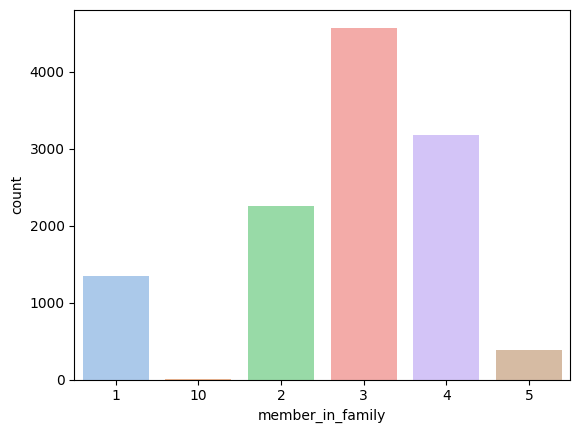

In [28]:
sns.countplot(x='member_in_family', data=df, palette='pastel')

<Axes: xlabel='preferred_device', ylabel='count'>

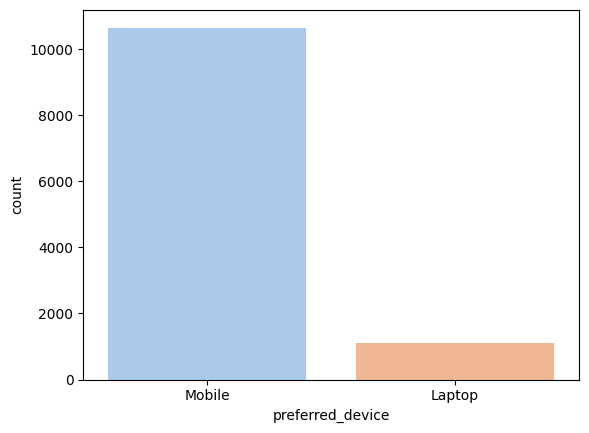

In [29]:
sns.countplot(x='preferred_device', data=df, palette='pastel')

<Axes: xlabel='preferred_location_type', ylabel='count'>

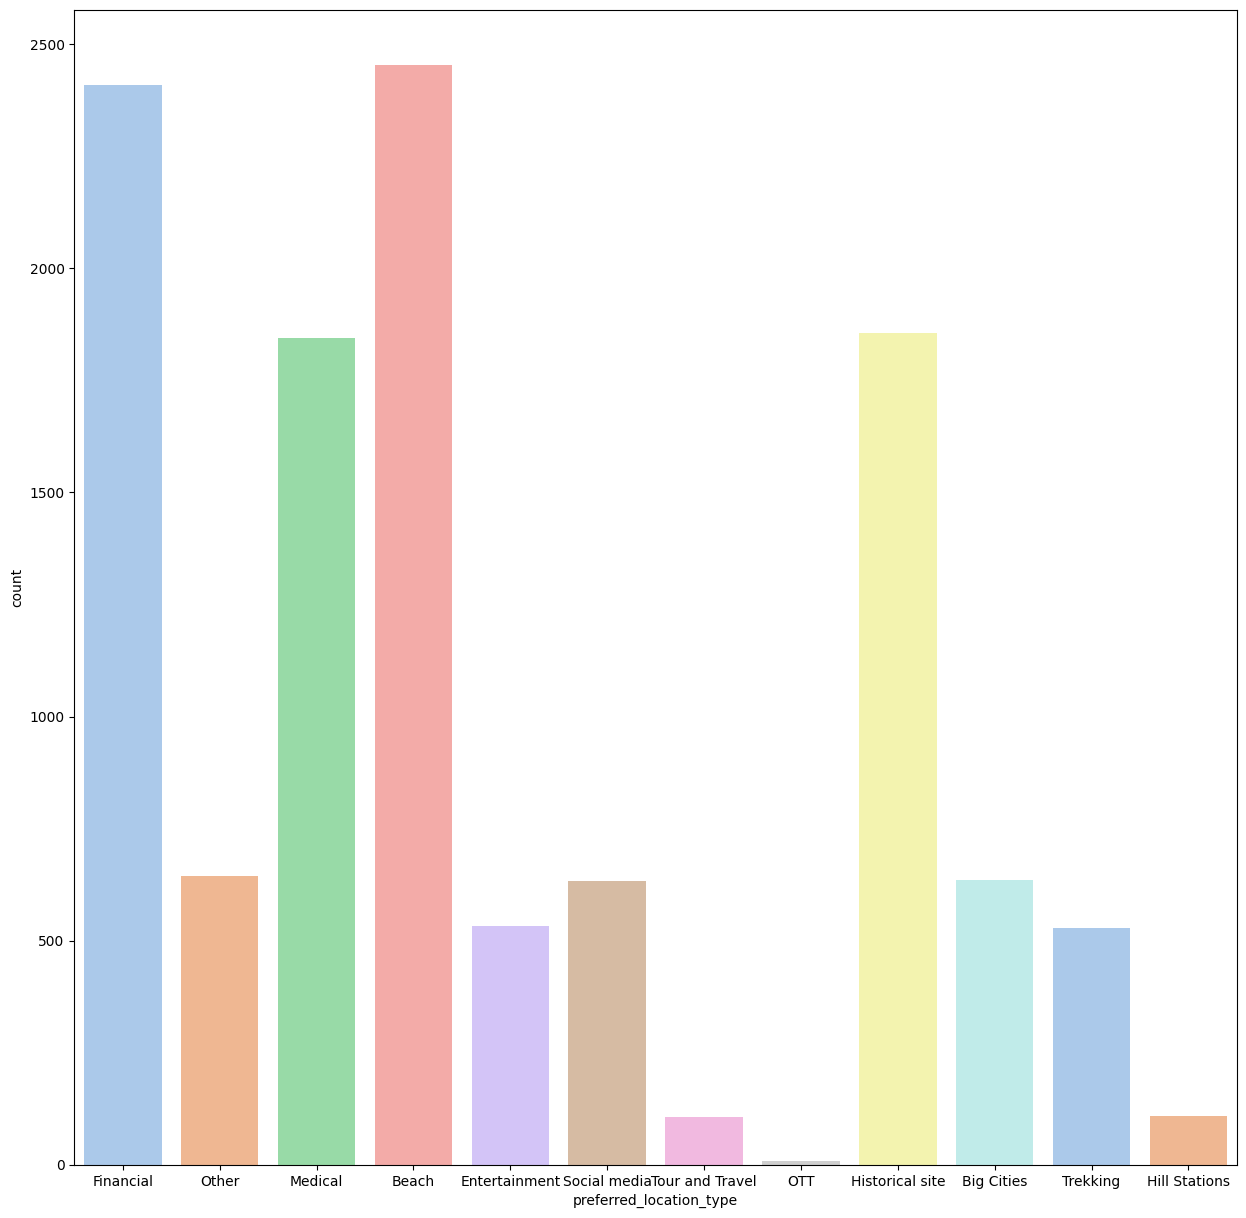

In [30]:
plt.figure(figsize=(15,15))
sns.countplot(x='preferred_location_type', data=df, palette='pastel')

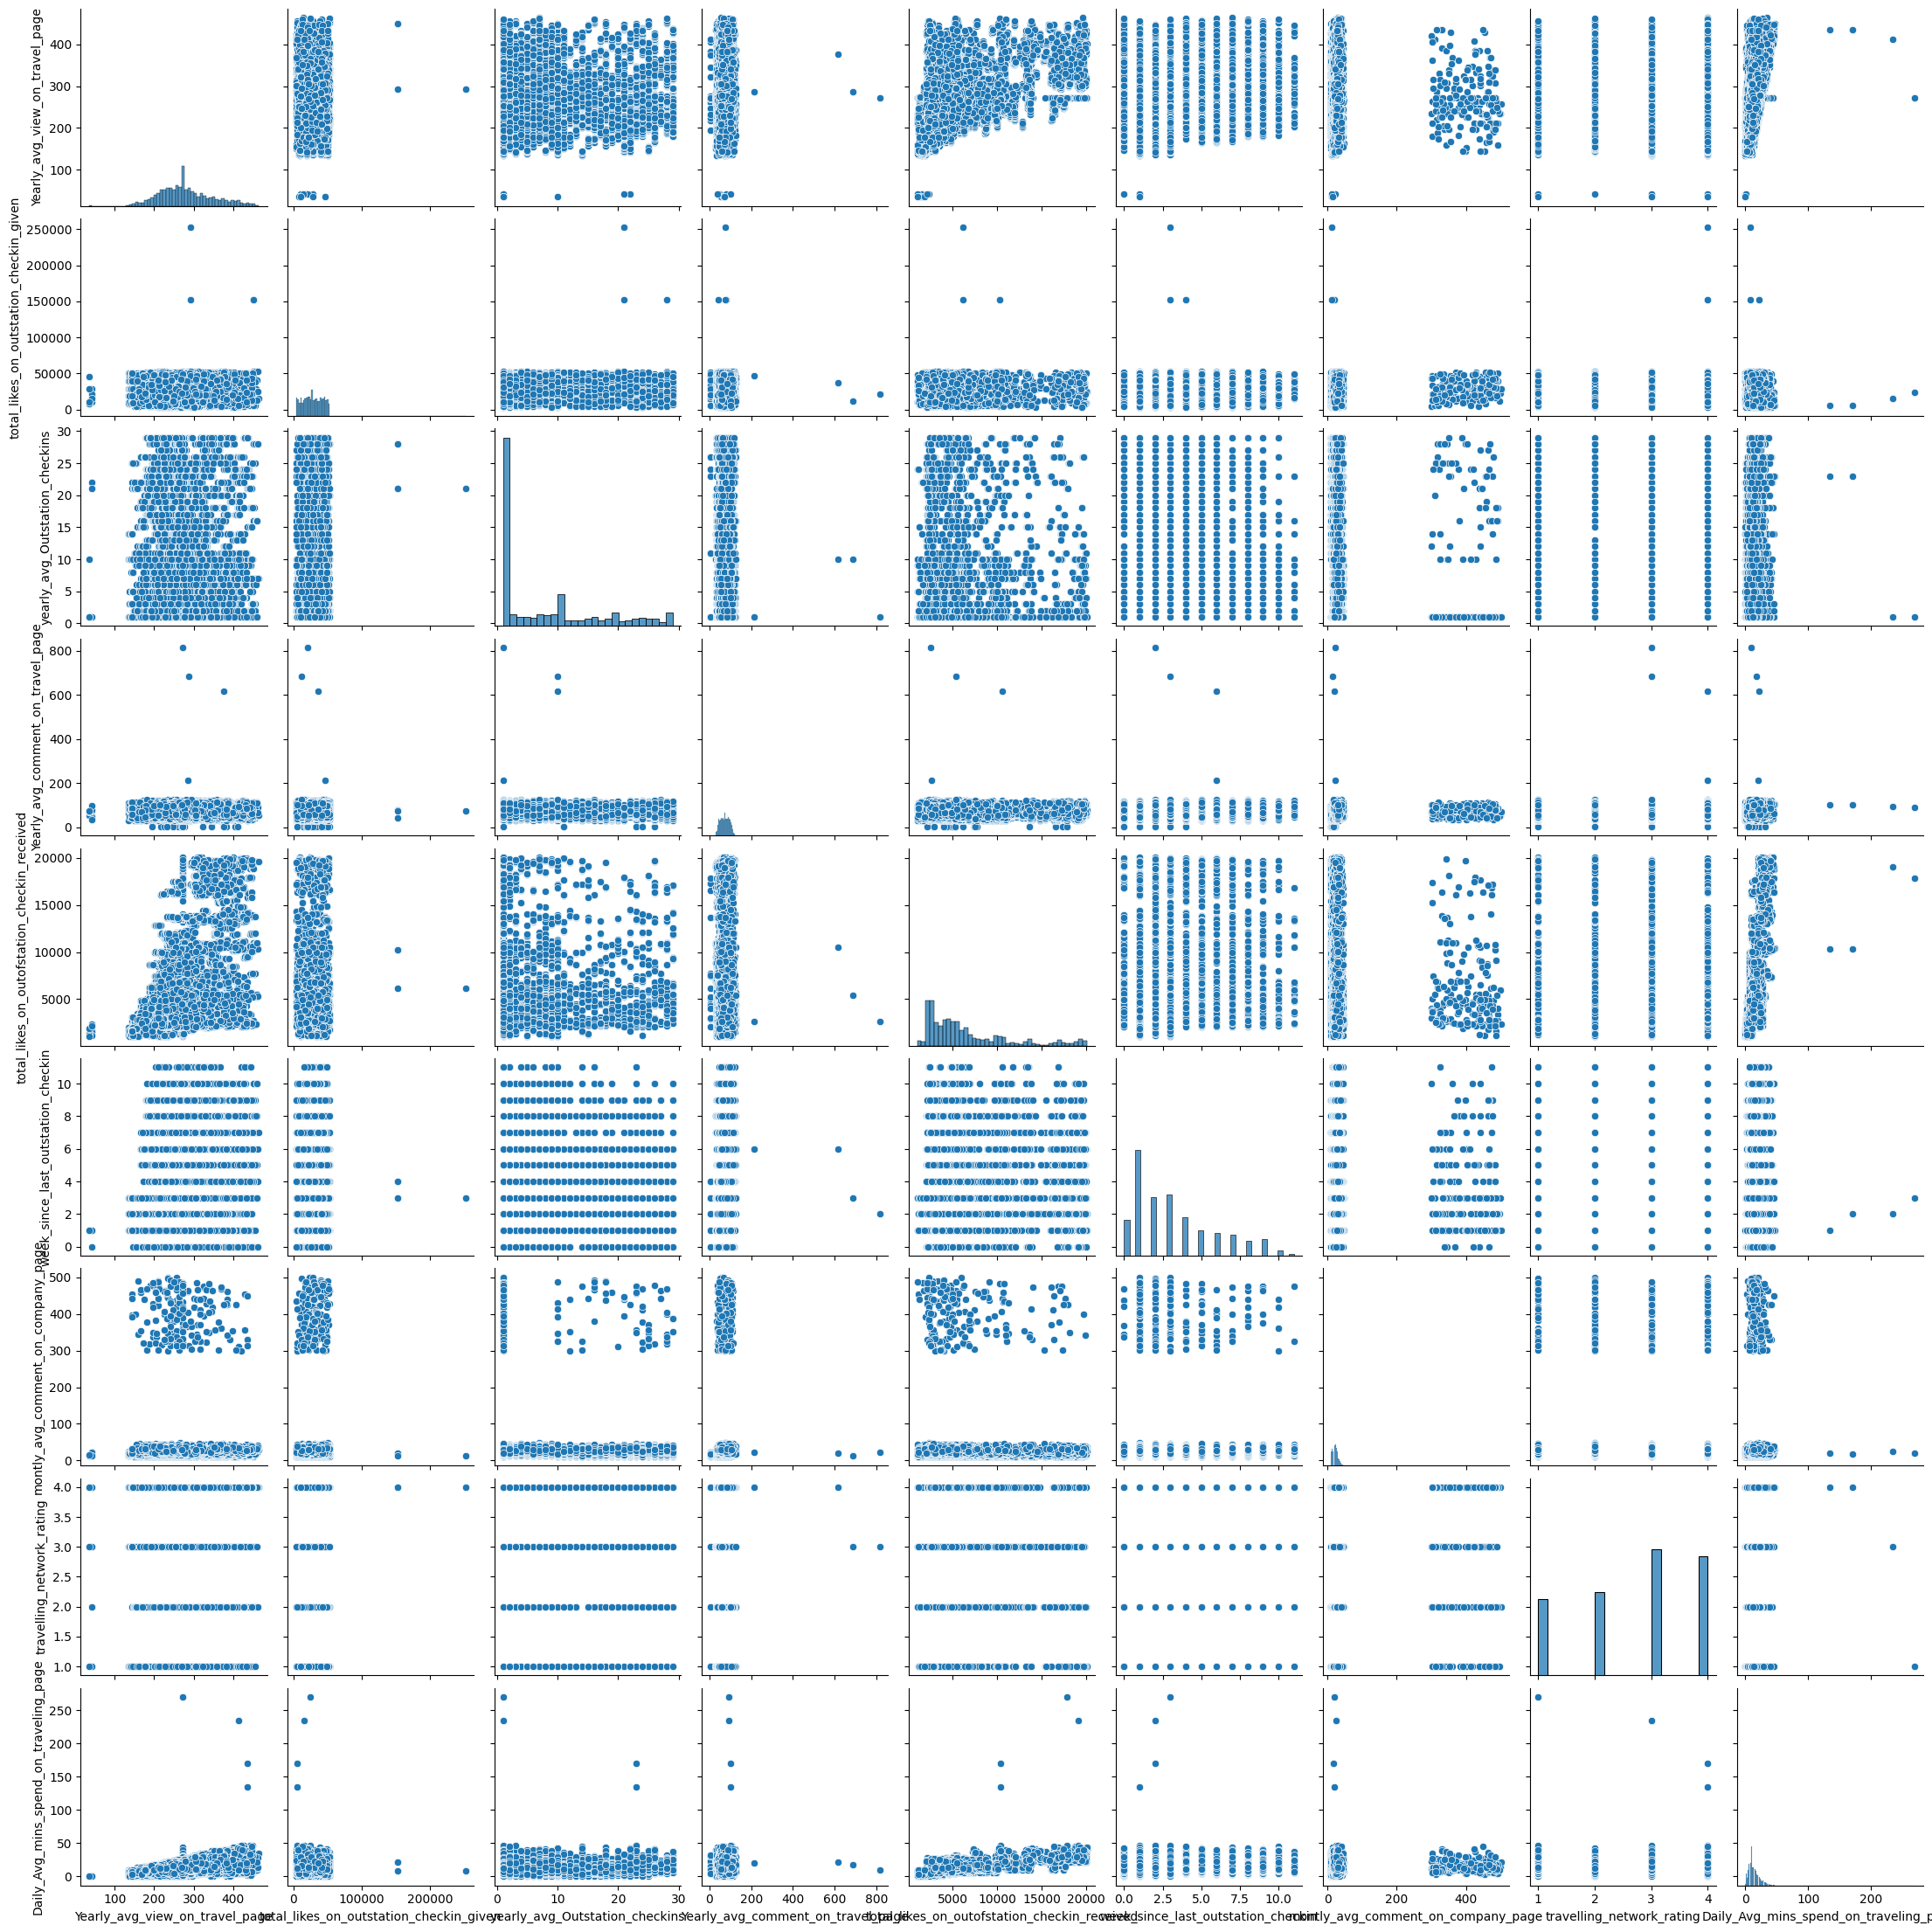

In [31]:
#Bivariate Analysis
sns.pairplot(df)
plt.show()

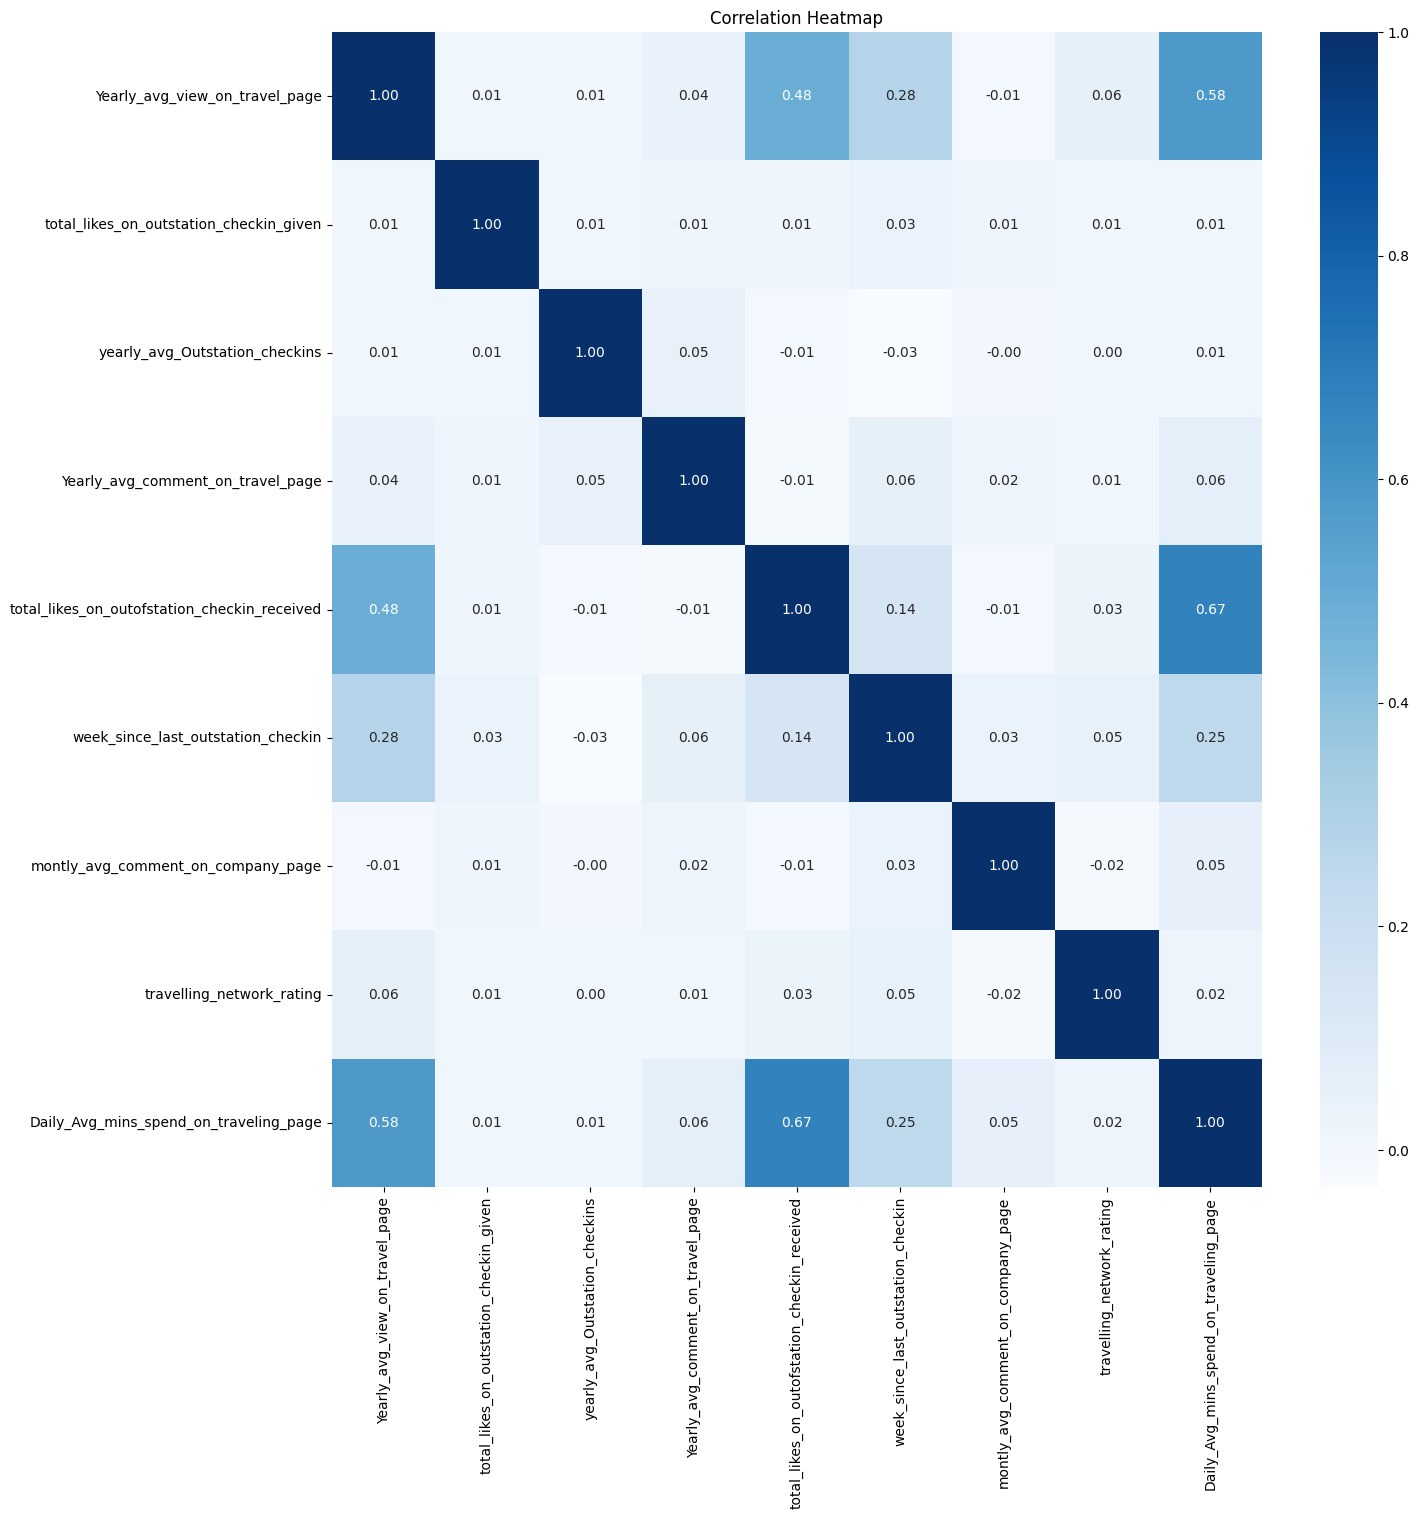

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

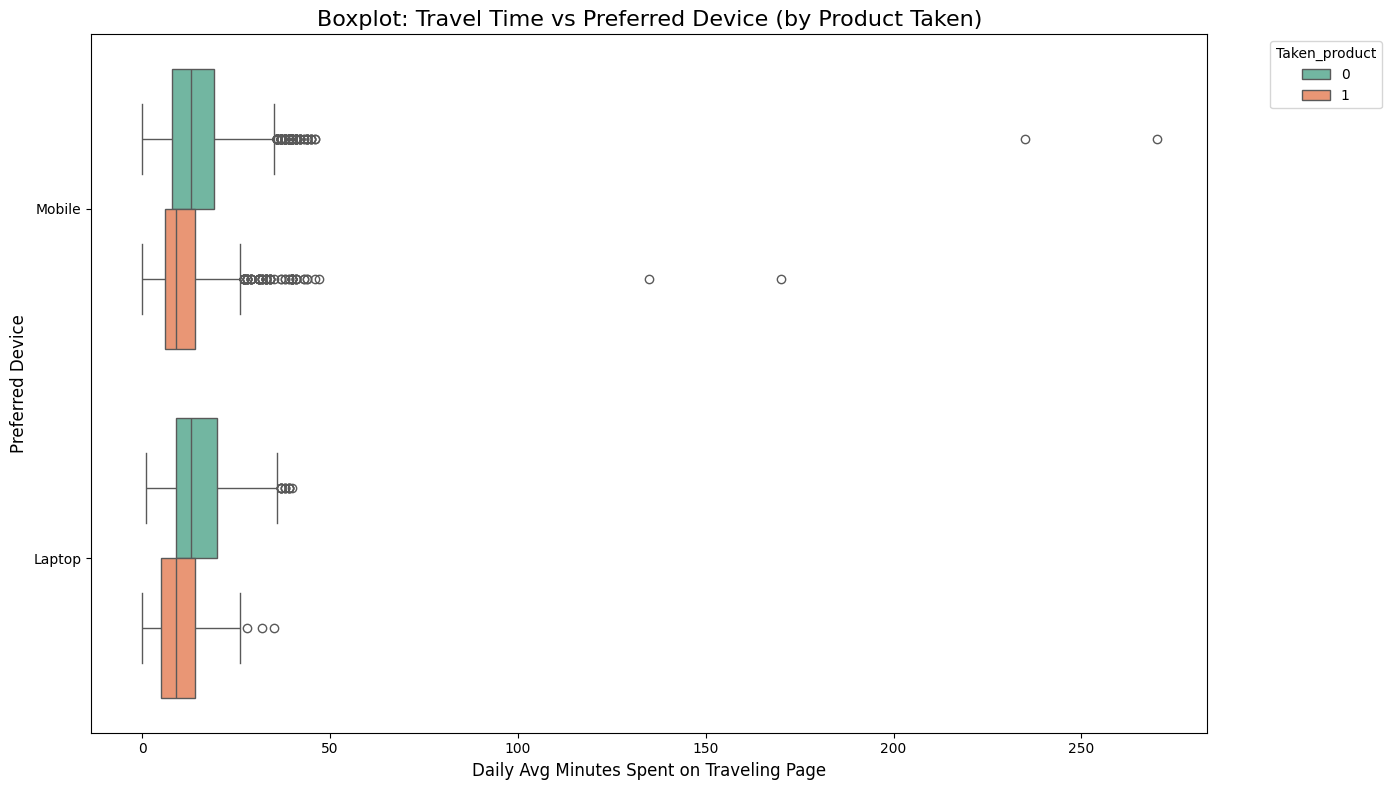

In [33]:
#Multivariate Analysis
plt.figure(figsize=(14, 8))
sns.boxplot(x='Daily_Avg_mins_spend_on_traveling_page',y='preferred_device',hue='Taken_product',data=df,palette='Set2')
plt.title('Boxplot: Travel Time vs Preferred Device (by Product Taken)', fontsize=16)
plt.xlabel('Daily Avg Minutes Spent on Traveling Page', fontsize=12)
plt.ylabel('Preferred Device', fontsize=12)
plt.legend(title='Taken_product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

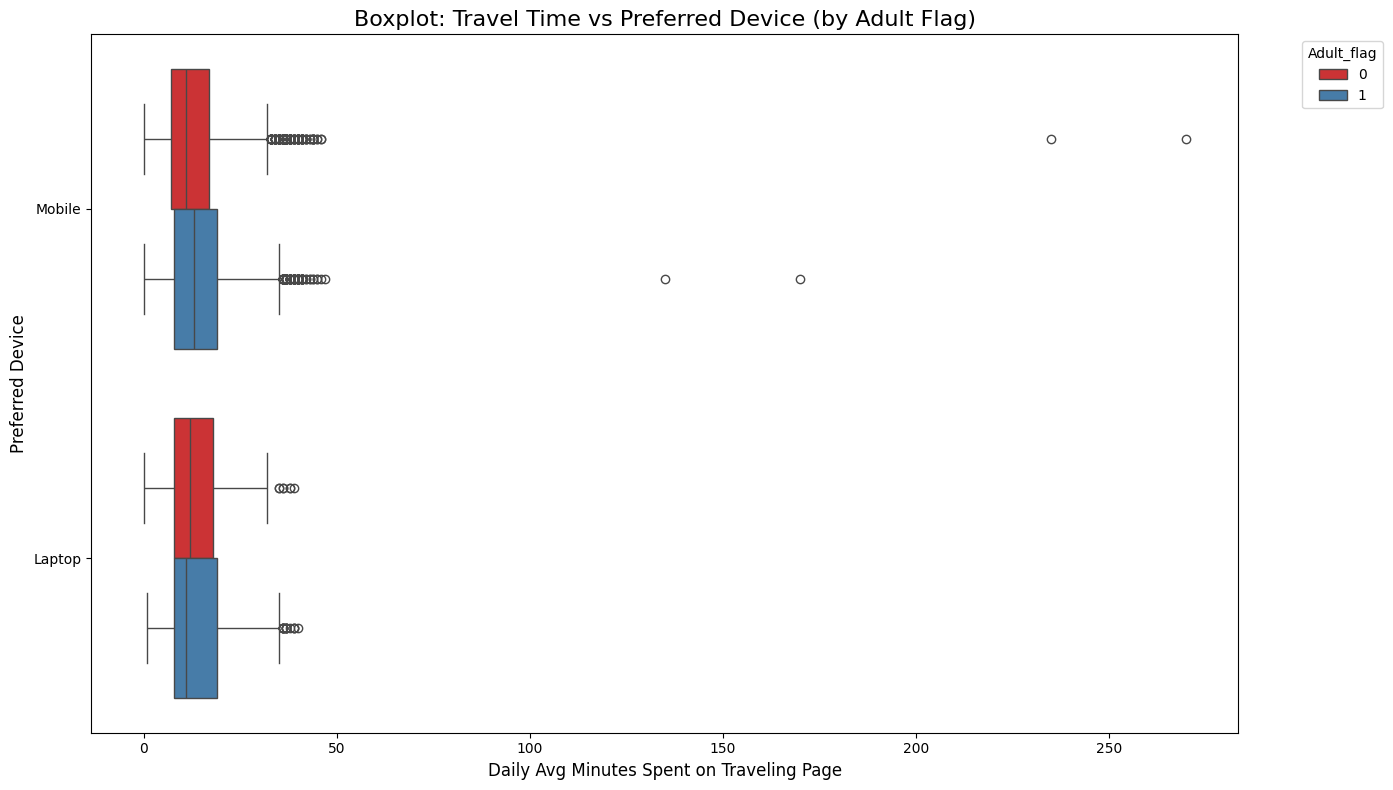

In [34]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Daily_Avg_mins_spend_on_traveling_page',y='preferred_device',hue='Adult_flag',data=df,palette='Set1')
plt.title('Boxplot: Travel Time vs Preferred Device (by Adult Flag)', fontsize=16)
plt.xlabel('Daily Avg Minutes Spent on Traveling Page', fontsize=12)
plt.ylabel('Preferred Device', fontsize=12)
plt.legend(title='Adult_flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

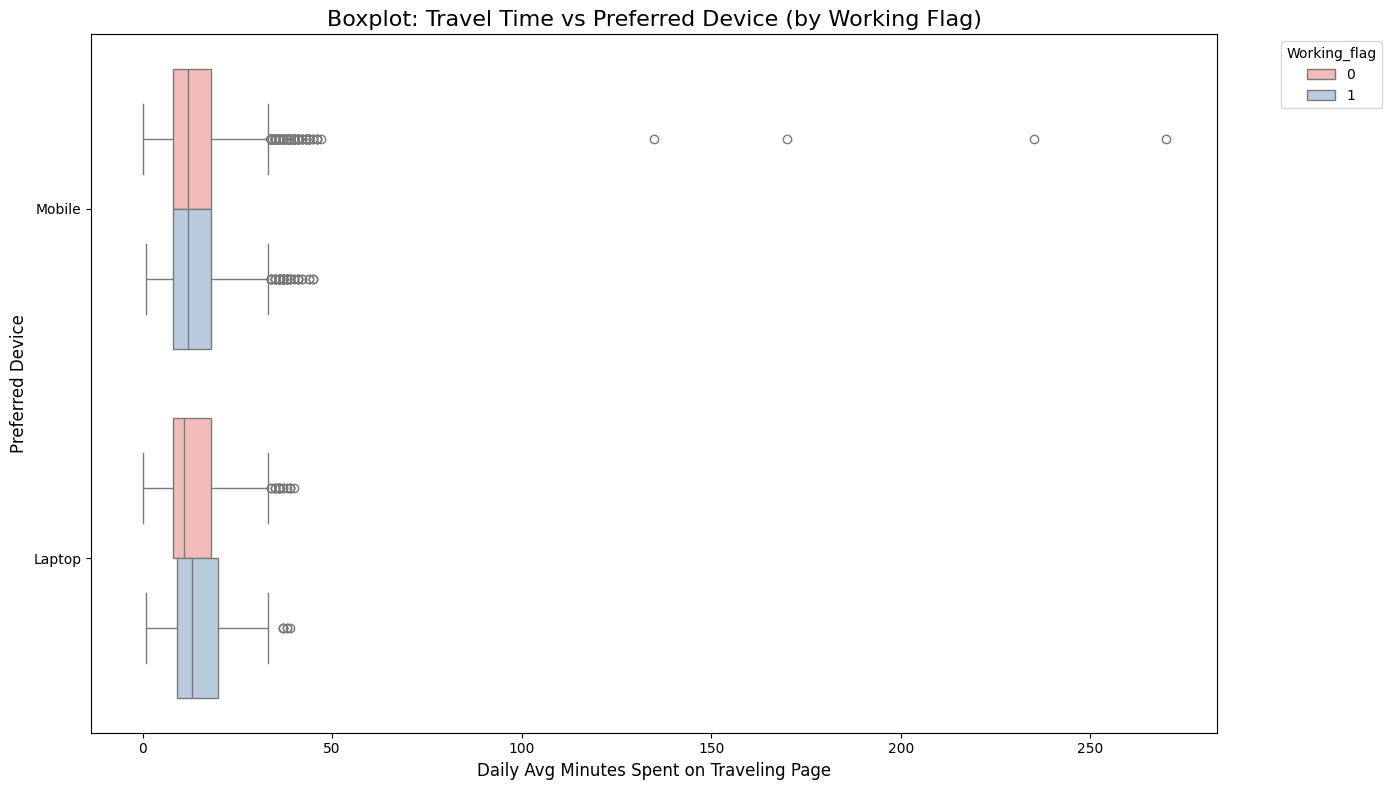

In [35]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Daily_Avg_mins_spend_on_traveling_page',y='preferred_device',hue='working_flag',data=df,palette='Pastel1')
plt.title('Boxplot: Travel Time vs Preferred Device (by Working Flag)', fontsize=16)
plt.xlabel('Daily Avg Minutes Spent on Traveling Page', fontsize=12)
plt.ylabel('Preferred Device', fontsize=12)
plt.legend(title='Working_flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

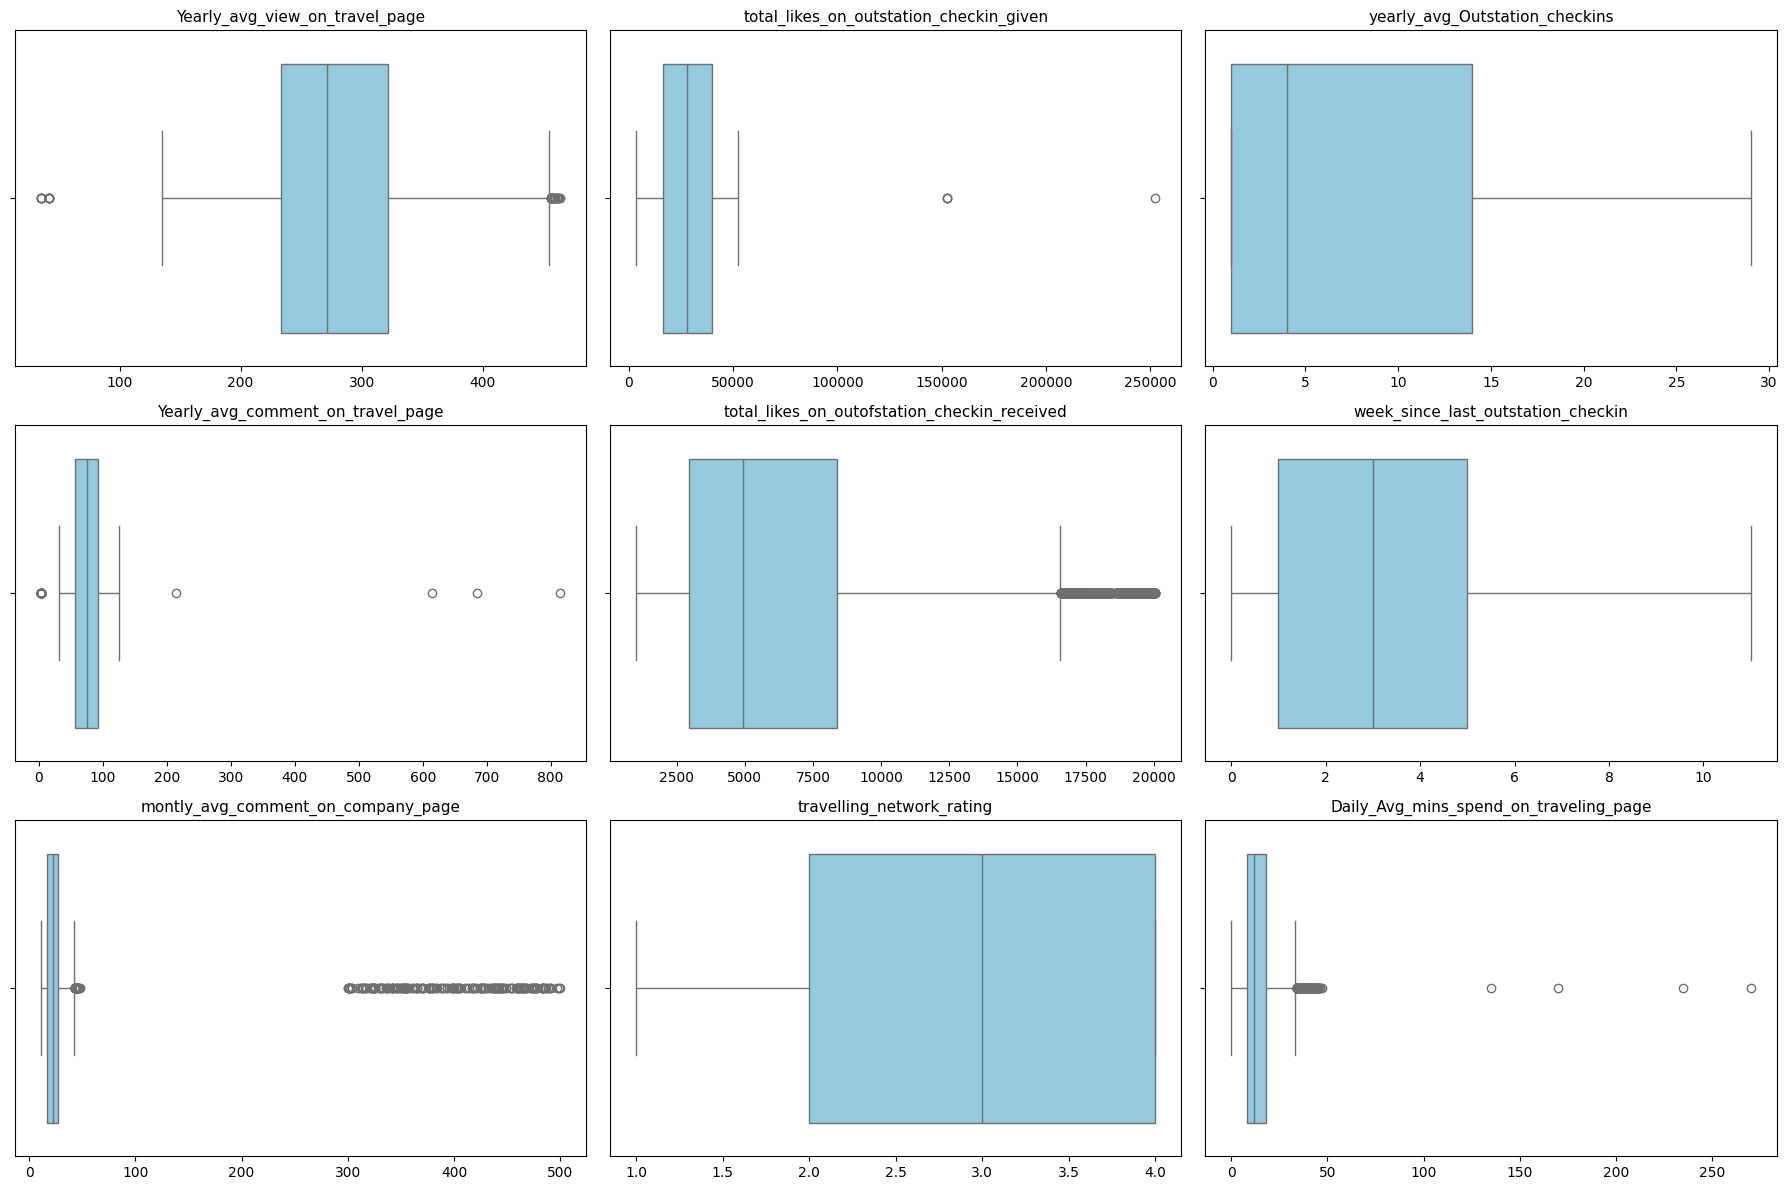

In [36]:
#outlier check and treatment
plt.figure(figsize=(18, 12))  
my_columns = ['Yearly_avg_view_on_travel_page', 
              'total_likes_on_outstation_checkin_given', 
              'yearly_avg_Outstation_checkins', 
              'Yearly_avg_comment_on_travel_page', 
              'total_likes_on_outofstation_checkin_received', 
              'week_since_last_outstation_checkin',
              'montly_avg_comment_on_company_page', 
              'travelling_network_rating',
              'Daily_Avg_mins_spend_on_traveling_page']
for i in range(len(my_columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[my_columns[i]], color='skyblue')
    plt.title(my_columns[i], fontsize=11)
    plt.xlabel('')  # Removes repetitive x-axis label
plt.tight_layout()
plt.show()

In [37]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [38]:
list_num=['Yearly_avg_view_on_travel_page','total_likes_on_outstation_checkin_given','yearly_avg_Outstation_checkins',
          'Yearly_avg_comment_on_travel_page','total_likes_on_outofstation_checkin_received',
          'week_since_last_outstation_checkin','montly_avg_comment_on_company_page','travelling_network_rating',
          'Daily_Avg_mins_spend_on_traveling_page']
for i in list_num:
    LL, UL = remove_outlier(df[i])
    df[i]= np.where(df[i] > UL, UL, df[i])
    df[i]= np.where(df[i] < LL, LL, df[i])

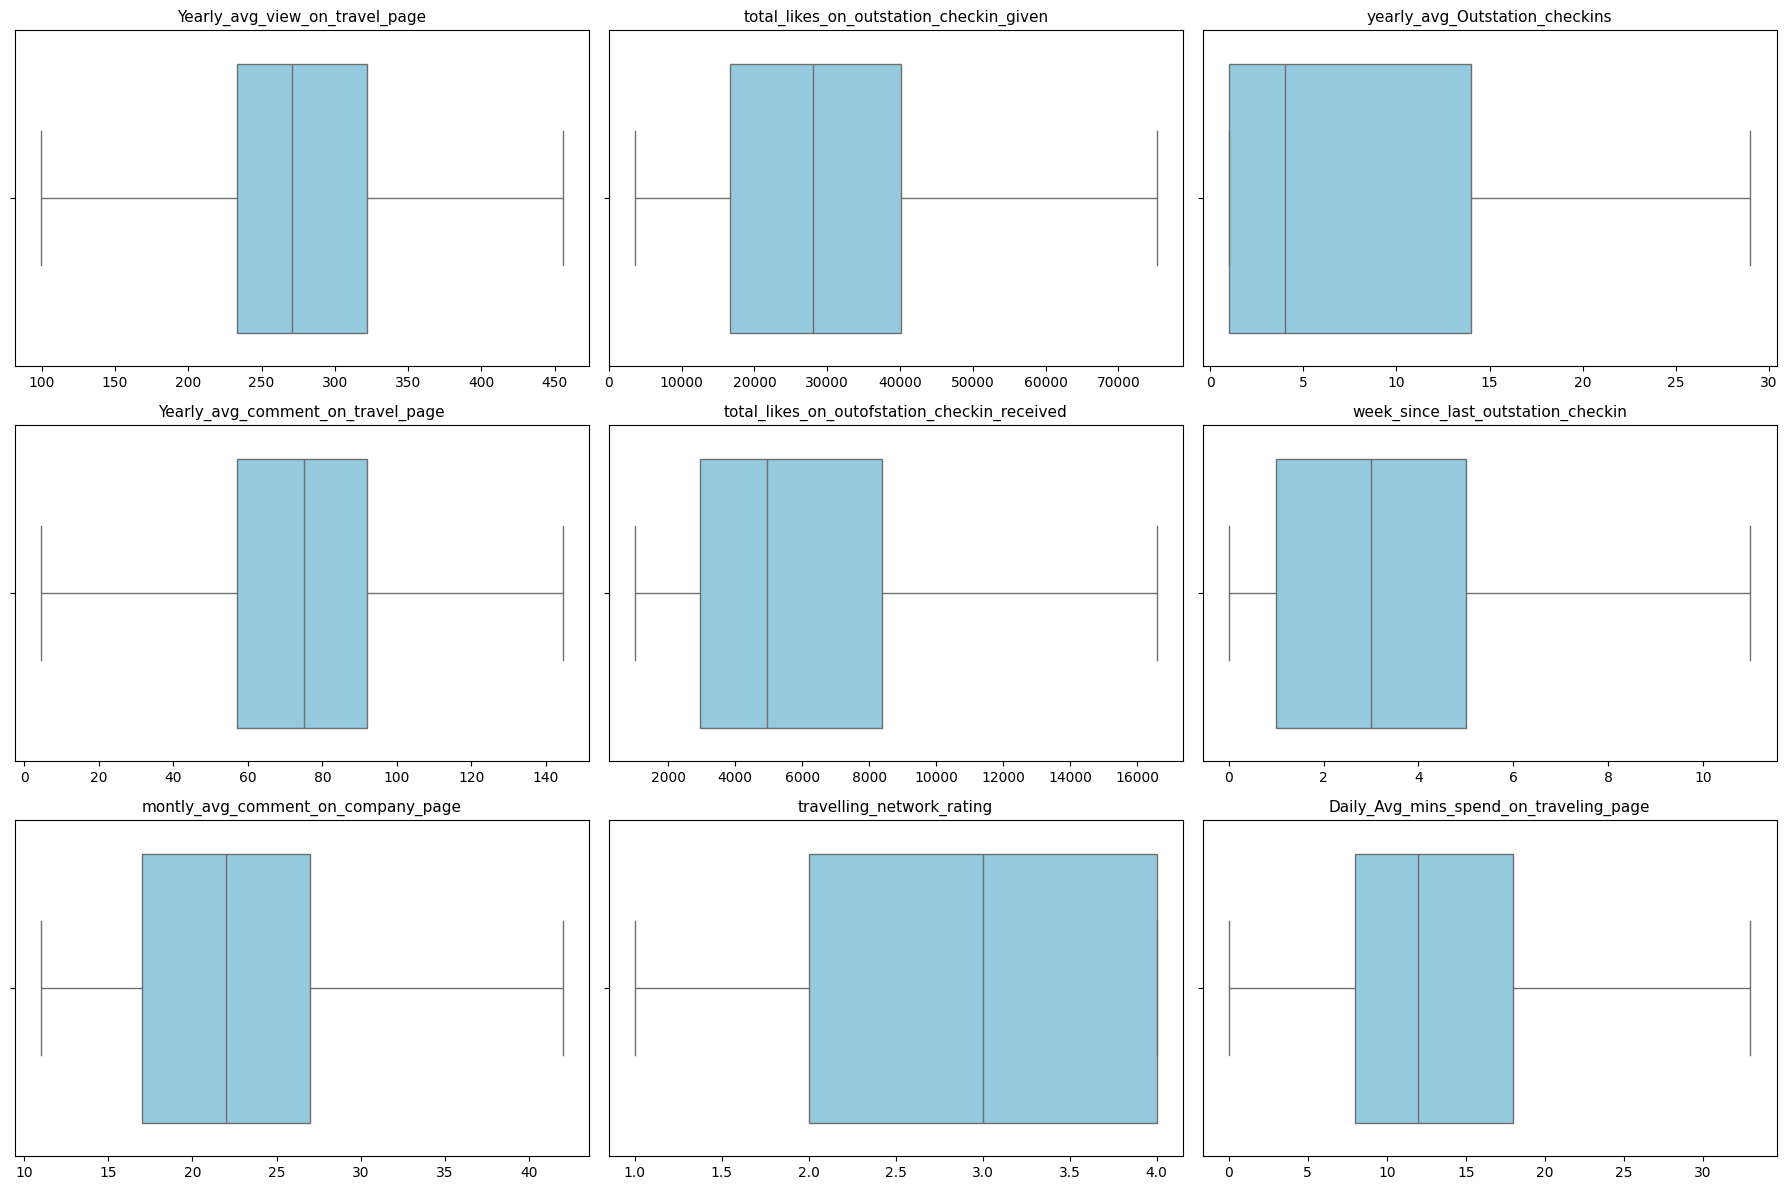

In [39]:
plt.figure(figsize=(18, 12)) 
my_columns = ['Yearly_avg_view_on_travel_page', 
              'total_likes_on_outstation_checkin_given', 
              'yearly_avg_Outstation_checkins', 
              'Yearly_avg_comment_on_travel_page', 
              'total_likes_on_outofstation_checkin_received', 
              'week_since_last_outstation_checkin',
              'montly_avg_comment_on_company_page', 
              'travelling_network_rating',
              'Daily_Avg_mins_spend_on_traveling_page']
for i in range(9):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[my_columns[i]], color='skyblue')
    plt.title(my_columns[i], fontsize=11)
    plt.xlabel('') 
plt.tight_layout()
plt.show()

In [40]:
#Outlier treatment using IQR method
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Capping outliers (winsorization)
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

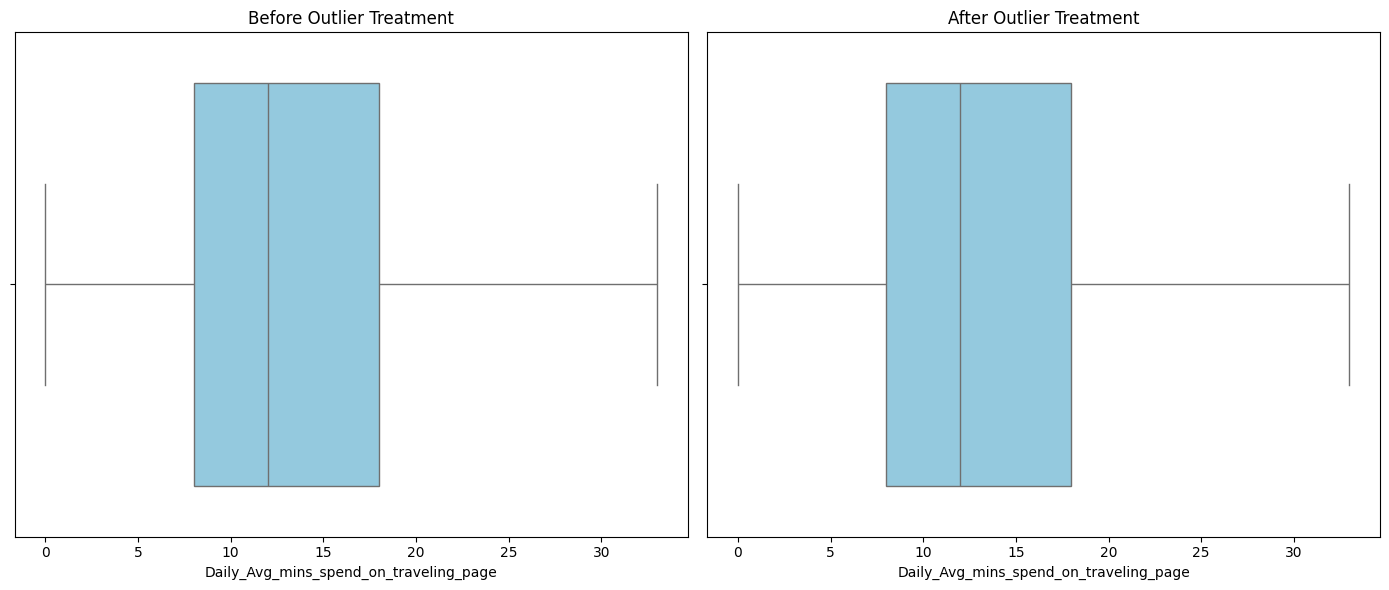

In [41]:
original_df = df.copy()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=original_df['Daily_Avg_mins_spend_on_traveling_page'], color='skyblue')
plt.title('Before Outlier Treatment')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Daily_Avg_mins_spend_on_traveling_page'], color='skyblue')
plt.title('After Outlier Treatment')

plt.tight_layout()
plt.show()

In [42]:
#scaling and normalization
list_numeric= []
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        list_numeric.append(i)
print(list_numeric)

['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin', 'montly_avg_comment_on_company_page', 'travelling_network_rating', 'Daily_Avg_mins_spend_on_traveling_page']


In [43]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
df1= pd.DataFrame(scale.fit_transform(df[list_numeric]), columns= list_numeric)
df1.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page
0,0.401152,0.751797,-0.828421,0.898954,-0.090842,1.833319,-1.611938,-1.584178,-0.705974
1,1.305515,-1.323014,-0.828421,-0.634092,-0.289462,-0.842262,0.019795,1.191438,-0.455347
2,-0.051030,1.434997,-0.828421,0.806042,-0.989117,1.068868,-1.068027,-0.658973,-0.831287
3,-0.503212,1.482897,-0.828421,-0.866371,-0.800624,-0.842262,-1.611938,0.266233,-0.705974
4,-1.181484,-0.536451,-0.828421,-1.609666,-0.671971,2.215545,-1.475960,1.191438,-0.956600


In [44]:
list_category= []
for i in df.columns:
    if df[i].dtype != 'int64' and df[i].dtype != 'float64':
        list_category.append(i)
print(list_category)

['Taken_product', 'preferred_device', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']


In [45]:
df2 = pd.DataFrame(df[list_category], columns= list_category)
df2.head()

,Taken_product,preferred_device,member_in_family,preferred_location_type,following_company_page,working_flag,Adult_flag
0,1,Mobile,2,Financial,1,0,0
1,0,Mobile,1,Financial,0,1,1
2,1,Mobile,2,Other,1,0,0
3,0,Mobile,4,Financial,1,0,0
4,0,Mobile,1,Medical,0,0,1


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Taken_product            11760 non-null  category
 1   preferred_device         11760 non-null  object  
 2   member_in_family         11760 non-null  category
 3   preferred_location_type  11760 non-null  object  
 4   following_company_page   11760 non-null  category
 5   working_flag             11760 non-null  category
 6   Adult_flag               11760 non-null  category
dtypes: category(5), object(2)
memory usage: 242.0+ KB


In [47]:
df_new = pd.concat([df1, df2], axis=1) 
df_new.head().T

,0,1,2,3,4
Yearly_avg_view_on_travel_page,0.401152,1.305515,-0.05103,-0.503212,-1.181484
total_likes_on_outstation_checkin_given,0.751797,-1.323014,1.434997,1.482897,-0.536451
yearly_avg_Outstation_checkins,-0.828421,-0.828421,-0.828421,-0.828421,-0.828421
Yearly_avg_comment_on_travel_page,0.898954,-0.634092,0.806042,-0.866371,-1.609666
total_likes_on_outofstation_checkin_received,-0.090842,-0.289462,-0.989117,-0.800624,-0.671971
week_since_last_outstation_checkin,1.833319,-0.842262,1.068868,-0.842262,2.215545
montly_avg_comment_on_company_page,-1.611938,0.019795,-1.068027,-1.611938,-1.47596
travelling_network_rating,-1.584178,1.191438,-0.658973,0.266233,1.191438
Daily_Avg_mins_spend_on_traveling_page,-0.705974,-0.455347,-0.831287,-0.705974,-0.9566
Taken_product,1,0,1,0,0


In [48]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Yearly_avg_view_on_travel_page                11760 non-null  float64 
 1   total_likes_on_outstation_checkin_given       11760 non-null  float64 
 2   yearly_avg_Outstation_checkins                11760 non-null  float64 
 3   Yearly_avg_comment_on_travel_page             11760 non-null  float64 
 4   total_likes_on_outofstation_checkin_received  11760 non-null  float64 
 5   week_since_last_outstation_checkin            11760 non-null  float64 
 6   montly_avg_comment_on_company_page            11760 non-null  float64 
 7   travelling_network_rating                     11760 non-null  float64 
 8   Daily_Avg_mins_spend_on_traveling_page        11760 non-null  float64 
 9   Taken_product                                 1176

In [49]:
#balancing
list_numeric.append('Taken_product')
default = pd.DataFrame(df[list_numeric], columns= list_numeric)
default.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Taken_product
0,307.0,38570.0,1.0,94.0,5993.0,8.0,11.0,1.0,8.0,1
1,367.0,9765.0,1.0,61.0,5130.0,1.0,23.0,4.0,10.0,0
2,277.0,48055.0,1.0,92.0,2090.0,6.0,15.0,2.0,7.0,1
3,247.0,48720.0,1.0,56.0,2909.0,1.0,11.0,3.0,8.0,0
4,202.0,20685.0,1.0,40.0,3468.0,9.0,12.0,4.0,6.0,0


In [50]:
from sklearn.model_selection import train_test_split
X = default.drop('Taken_product', axis = 1)
y = default['Taken_product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)
print(X_train.shape)
print(X_test.shape)

(8232, 9)
(3528, 9)


In [51]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0    0.84
1    0.16
Name: Taken_product, dtype: float64
 
0    0.84
1    0.16
Name: Taken_product, dtype: float64


In [52]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)
Default_smote = pd.concat([X_res, y_res], axis = 1)
default.groupby('Taken_product').mean().T

Taken_product,0,1
Yearly_avg_view_on_travel_page,284.726936,257.799578
total_likes_on_outstation_checkin_given,28462.161294,26418.400844
yearly_avg_Outstation_checkins,7.888686,9.676160
Yearly_avg_comment_on_travel_page,74.678629,74.496835
total_likes_on_outofstation_checkin_received,6701.655008,4754.397679
week_since_last_outstation_checkin,3.152271,3.470464
montly_avg_comment_on_company_page,22.879055,22.726266
travelling_network_rating,2.733982,2.599156
Daily_Avg_mins_spend_on_traveling_page,14.213504,10.617089


In [53]:
Default_smote.groupby('Taken_product').mean().T

Taken_product,0,1
Yearly_avg_view_on_travel_page,283.670963,261.073997
total_likes_on_outstation_checkin_given,28559.733671,26343.834580
yearly_avg_Outstation_checkins,7.994352,9.561413
Yearly_avg_comment_on_travel_page,74.590659,74.894209
total_likes_on_outofstation_checkin_received,6679.878928,4779.736282
week_since_last_outstation_checkin,3.137871,3.610166
montly_avg_comment_on_company_page,22.874873,22.859707
travelling_network_rating,2.732657,2.637072
Daily_Avg_mins_spend_on_traveling_page,14.128747,10.879203


In [54]:
from collections import Counter
sm = SMOTE(random_state=33, sampling_strategy = 0.75)

#fit predictor and target variable
X_res, y_res = sm.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_res))

Original dataset shape Counter({'0': 9864, '1': 1896})
Resample dataset shape Counter({'0': 6905, '1': 5178})


In [55]:
#clustering
X = StandardScaler()
scaled_df = X.fit_transform(default)
scaled_df

array([[ 0.40115152,  0.75179698, -0.82842061, ..., -1.58417824,
        -0.70597395,  2.28090588],
       [ 1.30551456, -1.32301383, -0.82842061, ...,  1.19143799,
        -0.45534744, -0.4384223 ],
       [-0.05102999,  1.43499713, -0.82842061, ..., -0.65897283,
        -0.8312872 ,  2.28090588],
       ...,
       [-1.00061118, -1.63180445, -0.48213294, ..., -0.65897283,
        -0.20472094, -0.4384223 ],
       [ 1.53160532,  0.55594867, -0.71299138, ...,  1.19143799,
         0.79778509, -0.4384223 ],
       [-0.15653901, -0.43993171, -0.02041605, ..., -1.58417824,
         0.04590557, -0.4384223 ]])

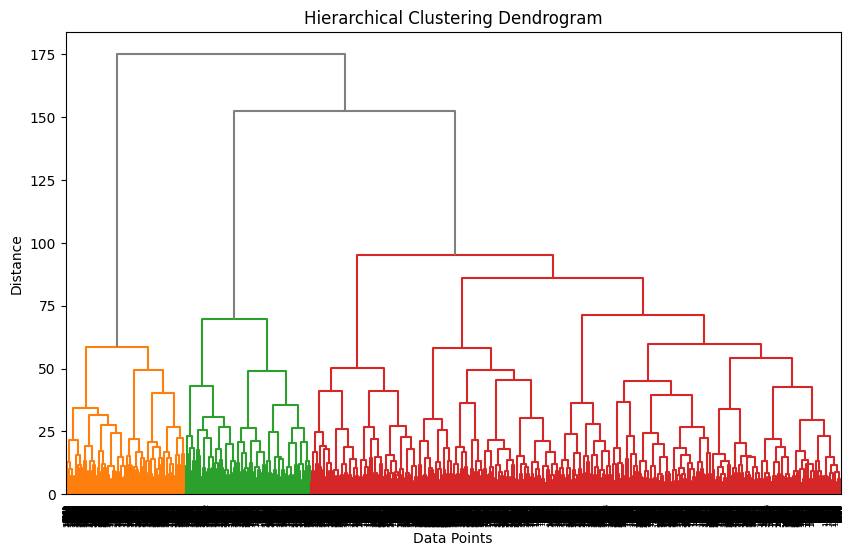

In [56]:
wardlink = linkage(scaled_df, method='ward')
plt.figure(figsize=(10, 6))
dend = dendrogram(
    wardlink,
    color_threshold=100,
    above_threshold_color='gray',  
    orientation='top',  
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

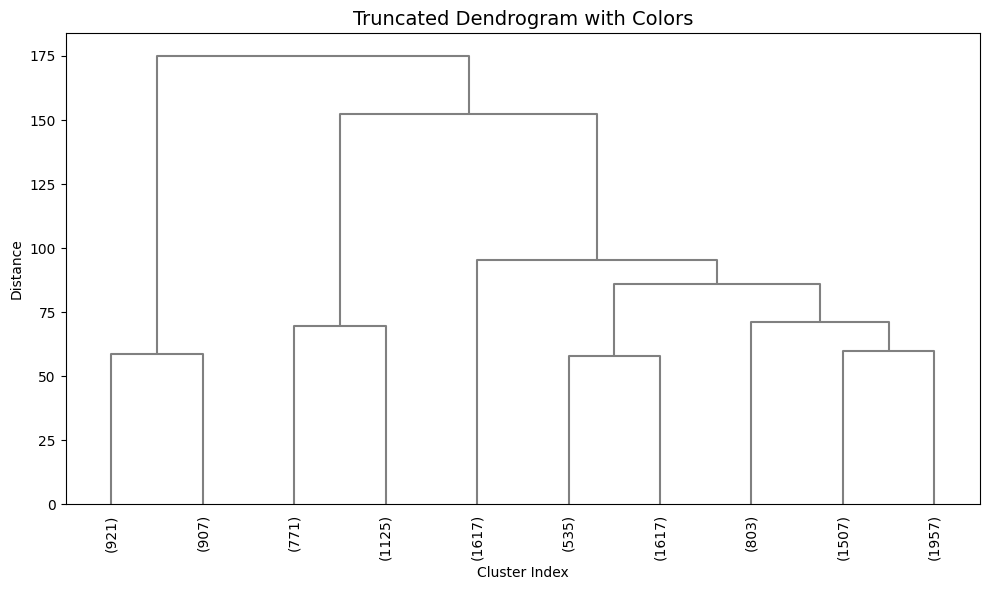

In [57]:
plt.figure(figsize=(10, 6))
dend = dendrogram(
    wardlink,
    truncate_mode='lastp',
    p=10,  
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=50,  
    above_threshold_color='gray',  
)
plt.title("Truncated Dendrogram with Colors", fontsize=14)
plt.xlabel("Cluster Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [58]:
clusters = fcluster(wardlink, 100, criterion='distance')
clusters

array([2, 3, 2, ..., 3, 1, 3], dtype=int32)

In [59]:
df_h = df_new
df_h['clusters'] = clusters
df_h.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Taken_product,preferred_device,member_in_family,preferred_location_type,following_company_page,working_flag,Adult_flag,clusters
0,0.401152,0.751797,-0.828421,0.898954,-0.090842,1.833319,-1.611938,-1.584178,-0.705974,1,Mobile,2,Financial,1,0,0,2
1,1.305515,-1.323014,-0.828421,-0.634092,-0.289462,-0.842262,0.019795,1.191438,-0.455347,0,Mobile,1,Financial,0,1,1,3
2,-0.051030,1.434997,-0.828421,0.806042,-0.989117,1.068868,-1.068027,-0.658973,-0.831287,1,Mobile,2,Other,1,0,0,2
3,-0.503212,1.482897,-0.828421,-0.866371,-0.800624,-0.842262,-1.611938,0.266233,-0.705974,0,Mobile,4,Financial,1,0,0,3
4,-1.181484,-0.536451,-0.828421,-1.609666,-0.671971,2.215545,-1.475960,1.191438,-0.956600,0,Mobile,1,Medical,0,0,1,3


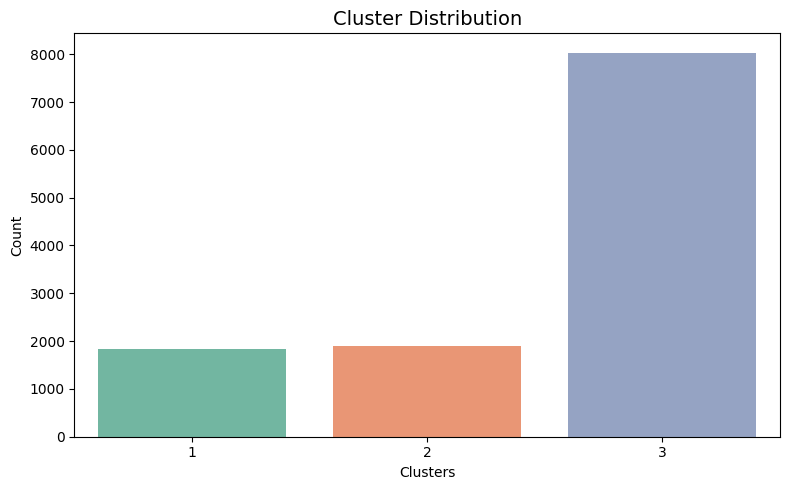

In [60]:
palette = sns.color_palette("Set2")  

plt.figure(figsize=(8, 5))
sns.countplot(data=df_h, x='clusters', palette=palette)

plt.title("Cluster Distribution", fontsize=14)
plt.xlabel("Clusters")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [61]:
df_h.clusters.value_counts().sort_index()

1    1828
2    1896
3    8036
Name: clusters, dtype: int64

In [62]:
aggdata=df_h.iloc[:,:].groupby('clusters').mean()
aggdata['Freq']=df_h.clusters.value_counts().sort_index()
aggdata.T

clusters,1,2,3
Yearly_avg_view_on_travel_page,1.207929,-0.340433,-0.194454
total_likes_on_outstation_checkin_given,0.123952,-0.123477,0.000937
yearly_avg_Outstation_checkins,0.021323,0.173062,-0.045682
Yearly_avg_comment_on_travel_page,0.107920,-0.007084,-0.022878
total_likes_on_outofstation_checkin_received,1.667517,-0.375906,-0.290630
week_since_last_outstation_checkin,0.480683,0.102013,-0.133413
montly_avg_comment_on_company_page,0.050442,-0.017426,-0.007363
travelling_network_rating,0.138688,-0.104630,-0.006862
Daily_Avg_mins_spend_on_traveling_page,1.539039,-0.378018,-0.260906
Freq,1828.000000,1896.000000,8036.000000


In [63]:
df_h.to_csv('hc.csv')

In [64]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

117599.99999999999

In [65]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
k_means.inertia_

98744.72802891082

In [66]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

88230.19152035941

In [67]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

81330.4399360816

In [68]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

76763.84760010692

In [69]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

72986.78119332455

In [70]:
inertia_values = []  
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_df)
    inertia_values.append(km.inertia_)
inertia_values

[117599.99999999999,
 98744.69745159542,
 88230.1915203594,
 81330.53409835928,
 76764.48295040725,
 72987.08883307384,
 70199.7630394613,
 68156.25580175701,
 66155.42771094888,
 64459.18648896186]

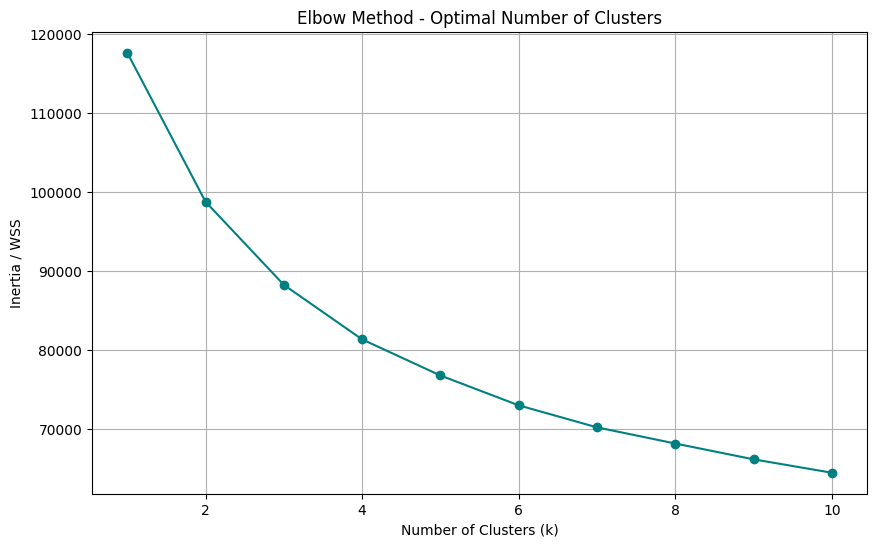

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='teal')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia / WSS')
plt.grid(True)
plt.show()

In [72]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_
df_k = df.copy()
df_k.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,307.0,Mobile,38570.0,1.0,2,Financial,94.0,5993.0,8.0,1,11.0,0,1.0,0,8.0
1,0,367.0,Mobile,9765.0,1.0,1,Financial,61.0,5130.0,1.0,0,23.0,1,4.0,1,10.0
2,1,277.0,Mobile,48055.0,1.0,2,Other,92.0,2090.0,6.0,1,15.0,0,2.0,0,7.0
3,0,247.0,Mobile,48720.0,1.0,4,Financial,56.0,2909.0,1.0,1,11.0,0,3.0,0,8.0
4,0,202.0,Mobile,20685.0,1.0,1,Medical,40.0,3468.0,9.0,0,12.0,0,4.0,1,6.0


In [73]:
df_k['preferred_device'].unique()

array(['Mobile', 'Laptop'], dtype=object)

In [74]:
df_k.shape

(11760, 16)

In [75]:
laptop=df_k.loc[df_k.preferred_device=='Laptop']

In [76]:
laptop.shape

(1108, 16)

In [77]:
laptop.to_csv('Laptop Dataset.csv', index=False)
mobile=df_k.loc[df_k.preferred_device=='Mobile']
mobile.to_csv('Mobile Dataset.csv', index=False)
mobile.shape

(10652, 16)

In [78]:
df_k["Clus_kmeans"] = labels 
df_k.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Clus_kmeans
0,1,307.0,Mobile,38570.0,1.0,2,Financial,94.0,5993.0,8.0,1,11.0,0,1.0,0,8.0,2
1,0,367.0,Mobile,9765.0,1.0,1,Financial,61.0,5130.0,1.0,0,23.0,1,4.0,1,10.0,0
2,1,277.0,Mobile,48055.0,1.0,2,Other,92.0,2090.0,6.0,1,15.0,0,2.0,0,7.0,2
3,0,247.0,Mobile,48720.0,1.0,4,Financial,56.0,2909.0,1.0,1,11.0,0,3.0,0,8.0,0
4,0,202.0,Mobile,20685.0,1.0,1,Medical,40.0,3468.0,9.0,0,12.0,0,4.0,1,6.0,0


In [79]:
silhouette_score(scaled_df,labels)

0.18431838342228624

In [80]:
sil_width = silhouette_samples(scaled_df,labels)
df_k["sil_width"] = sil_width
df_k.head(5)

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Clus_kmeans,sil_width
0,1,307.0,Mobile,38570.0,1.0,2,Financial,94.0,5993.0,8.0,1,11.0,0,1.0,0,8.0,2,0.147842
1,0,367.0,Mobile,9765.0,1.0,1,Financial,61.0,5130.0,1.0,0,23.0,1,4.0,1,10.0,0,0.181546
2,1,277.0,Mobile,48055.0,1.0,2,Other,92.0,2090.0,6.0,1,15.0,0,2.0,0,7.0,2,0.174823
3,0,247.0,Mobile,48720.0,1.0,4,Financial,56.0,2909.0,1.0,1,11.0,0,3.0,0,8.0,0,0.248563
4,0,202.0,Mobile,20685.0,1.0,1,Medical,40.0,3468.0,9.0,0,12.0,0,4.0,1,6.0,0,0.148355


In [81]:
silhouette_samples(scaled_df,labels).min()

-0.06045571513547656

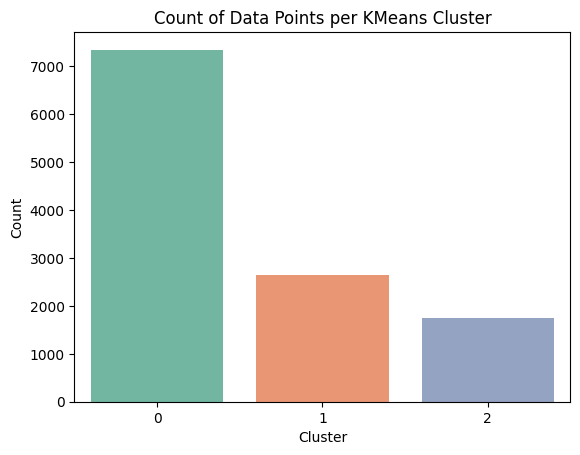

In [82]:
sns.countplot(data=df_k, x='Clus_kmeans', palette='Set2')  
plt.title("Count of Data Points per KMeans Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

In [83]:
df_k[df_k['Clus_kmeans'] == 0].shape

(7348, 18)

In [84]:
df_k[df_k['Clus_kmeans'] == 1].shape

(2654, 18)

In [85]:
df_k[df_k['Clus_kmeans'] == 2].shape

(1758, 18)

In [86]:
df_k.Clus_kmeans.value_counts().sort_index()

0    7348
1    2654
2    1758
Name: Clus_kmeans, dtype: int64

In [87]:
clust_profile=df_k.groupby('Clus_kmeans').mean()
clust_profile['freq']=df_k.Clus_kmeans.value_counts().sort_index()
clust_profile.T

Clus_kmeans,0,1,2
Yearly_avg_view_on_travel_page,261.529872,353.457046,248.883959
total_likes_on_outstation_checkin_given,28431.169230,28480.957988,26359.131399
yearly_avg_Outstation_checkins,7.842406,8.009043,9.828214
Yearly_avg_comment_on_travel_page,73.995985,76.914280,73.960751
total_likes_on_outofstation_checkin_received,4763.317637,12381.002261,4129.365757
week_since_last_outstation_checkin,2.717202,4.454785,3.347554
montly_avg_comment_on_company_page,22.517692,23.834589,22.782139
travelling_network_rating,2.712167,2.820271,2.549488
Daily_Avg_mins_spend_on_traveling_page,10.669842,24.732102,9.266780
sil_width,0.200609,0.146023,0.174043
